In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import interpolate
from glob import glob
from os.path import join, abspath
from os import pardir, mkdir
from matplotlib.ticker import LinearLocator

In [2]:
root_data_dir = abspath(join(pardir, "Data"))
comp_dir = join(root_data_dir, "Effective-Volume")
spec_dir = join(root_data_dir, "Spectral-Class")

In [3]:
name = "Number-Density"
data_dir = join(root_data_dir, name)
try:
    mkdir(data_dir)
    print(f"Creating {name} dir in Data dir")
except FileExistsError:
    print("Directory already exist. Good to go!")

Directory already exist. Good to go!


In [4]:
comp_raw = vaex.open(join(comp_dir, "comp-AG-extended-per-jk.hdf5"))
comp_raw

#,comp_per_jk,JK,z
0,3.0102919055569836e-07,-0.10790019035339356,-197.97979797979798
1,3.01611263834806e-07,-0.10790019035339356,-193.93939393939394
2,3.0213753702660635e-07,-0.10790019035339356,-189.8989898989899
3,3.024371612709229e-07,-0.10790019035339356,-185.85858585858585
4,3.0243204186622707e-07,-0.10790019035339356,-181.8181818181818
...,...,...,...
"9,994",0.00024904545005618035,0.43089966773986815,181.81818181818187
"9,995",0.00024971426288818334,0.43089966773986815,185.85858585858588
"9,996",0.00025041155651743687,0.43089966773986815,189.8989898989899
"9,997",0.0002511287778409573,0.43089966773986815,193.93939393939394


In [5]:
z = comp_raw.z.to_numpy()
z = np.unique(z)

JK = comp_raw.JK.to_numpy()
JK = np.unique(JK)

comp = np.zeros((len(z), len(JK)))
for i in range(len(z)):
    comp[i] = comp_raw[comp_raw.z == z[i]].comp_per_jk.to_numpy()
comp

array([[3.01029191e-07, 1.83680270e-06, 9.08514330e-06, ...,
        6.85880186e-03, 1.44929358e-03, 2.51845927e-04],
       [3.01611264e-07, 1.83824228e-06, 9.08433120e-06, ...,
        6.84125063e-03, 1.44532092e-03, 2.51128778e-04],
       [3.02137537e-07, 1.83970582e-06, 9.08402567e-06, ...,
        6.82450147e-03, 1.44144117e-03, 2.50411557e-04],
       ...,
       [3.02137537e-07, 1.83970582e-06, 9.08402567e-06, ...,
        6.82450147e-03, 1.44144117e-03, 2.50411557e-04],
       [3.01611264e-07, 1.83824228e-06, 9.08433120e-06, ...,
        6.84125063e-03, 1.44532092e-03, 2.51128778e-04],
       [3.01029191e-07, 1.83680270e-06, 9.08514330e-06, ...,
        6.85880186e-03, 1.44929358e-03, 2.51845927e-04]])

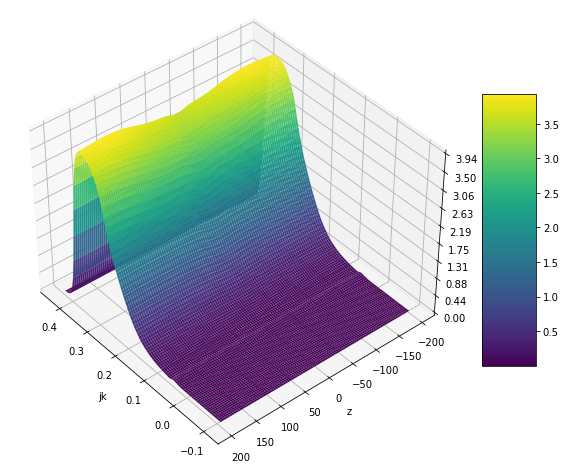

In [6]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
jk, zz = np.meshgrid(JK,z) 
surf = ax.plot_surface(jk, zz, comp, cmap='viridis', rstride=1, cstride=1,
                 edgecolor='none')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(elev=40., azim=140)
ax.set_xlabel("jk")
ax.set_ylabel("z")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [7]:
comp_interp_ = interpolate.interp2d(JK, z, comp, kind='linear', fill_value=0)
comp_interp = lambda jk, zz: np.maximum(comp_interp_(jk, zz), 0)

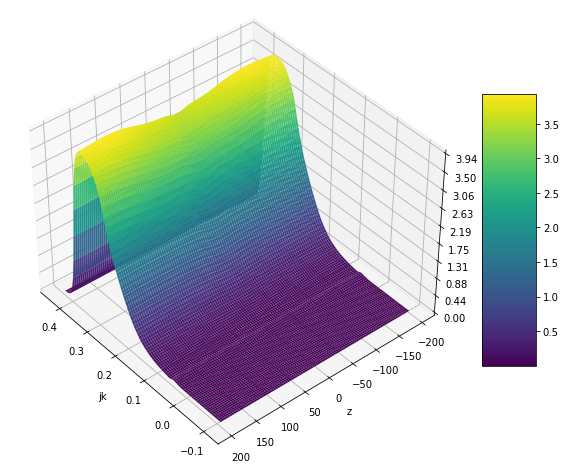

In [8]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
jk, zz = np.meshgrid(JK,z) 
surf = ax.plot_surface(jk, zz, comp, cmap='viridis', rstride=1, cstride=1,
                 edgecolor='none')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(elev=40., azim=140)
ax.set_xlabel("jk")
ax.set_ylabel("z")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [9]:
comp_interp_ = interpolate.interp2d(JK, z, comp, kind='linear', fill_value=0)
comp_interp = lambda jk, zz: np.maximum(comp_interp_(jk, zz), 0)

In [10]:
comp_interp_(1, 2)[0]

0.0

Text(0, 0.5, 'compz')

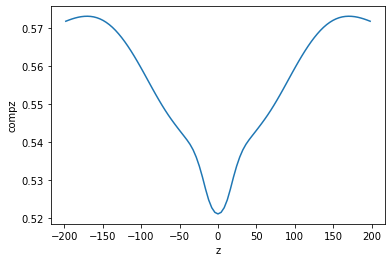

In [11]:
Delta = (JK[1] - JK[0])
compzz = np.sum(comp, axis=1)*Delta
plt.plot(z, compzz)
plt.xlabel("z")
plt.ylabel("compz")
# plt.ylim(0.5,1)

In [12]:
df = vaex.open(join(spec_dir, "thin-AG-extended.hdf5"))
df

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965,-3.3309029530010754,23.750181221585272,-10.704752079865358,6.905373172511865e-07,1.2599324527838945e-07,1.242128754806905e-09,0.18245682330381394,101.43332145786746,True,False,False
1,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011612,nan,nan,nan,--,0.35499954,3.5248296055634105,128.83505308420672,-10.658027575228331,128.3934474629295,2.084985296937152,-33.16804693834653,0.009625732972802784,0.012502401366350753,-20.25500159712633,1.2732549672866635,-0.035885086343476855,0.0062778765657406374,-25.844257078975943,0.039018331142753694,66.49251491416751,0.18800647404173246,44.97401889181693,0.12984776090651662,48.99197222546775,0.13610806369698816,2.4399851772656715,4.066397988698235,48.99197222546775,44.97401889181693,-18.594257078975943,1.2081950646993147e-08,2.6966985225558115e-08,6.001407660430157e-10,2.2320059081080115,44.93443330531096,True,False,False
2,3.8365084107078,-1.124264903059605,7.99,7.688,5850063632703452032,136.3025,-115.41101749515323,0.007777478,-72.5166878928762,0.013093553,9.26702172368321,0.013831709,8.920873,9.205091,8.46858,5.484650924968544,-0.06875462698467669,107.4739,107.3137,107.63,0.0004,1e-04,0.0012,F,--,-16.9925594329834,0.1674196422100067,gaia,5933.818359375,0.90869140625,1.35888671875,0.0,gspphot,4.207900047302246,0.0009002685546875,0.0008997917175292969,0.0,gspphot,-0.16369999945163727,0.0031000077724456787,0.003299996256828308,0.0,gspphot,0.10000000149011612,0.020000003278255463,0.009999997913837433,0.0,gspspec,-0.05000000074505806,0.08999999985098839

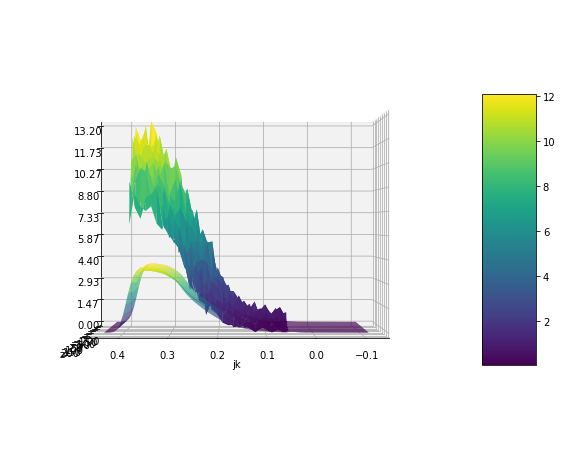

In [13]:
df_mask = df.filter("JK > 0.05").extract()
jk_AG = df_mask["JK"].to_numpy()
z_AG = df_mask["z"].to_numpy()

H, xedges, yedges = np.histogram2d(jk_AG, z_AG, bins=30)
dJK = xedges[1] - xedges[0]
dz = yedges[1] - yedges[0]
H = H/(dz)
# plot the 2D histogram
z_data = (yedges[1:] + yedges[:-1])/2
jk_data = (xedges[1:] + xedges[:-1])/2
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
Z_data, JK_data = np.meshgrid(z_data, jk_data)
surf = ax.plot_surface(JK_data, Z_data, H, cmap='viridis', rstride=1, cstride=1,
                    edgecolor='none')
surf2 = ax.plot_surface(jk, zz, comp, cmap='viridis', rstride=1, cstride=1,
                 edgecolor='none')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(elev=00., azim=90)
ax.set_xlabel("jk")
ax.set_ylabel("z")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [14]:
comp_10 = np.empty_like(H)
for i, jk_ in enumerate(jk_data):
    for j, z_ in enumerate(z_data):
        comp_10[i,j] = comp_interp(jk_, z_)
comp_10[:5,:5]

array([[0.03716295, 0.0377038 , 0.03817936, 0.03853078, 0.03873921],
       [0.02369909, 0.02385488, 0.02397676, 0.02406644, 0.0240738 ],
       [0.04139835, 0.04162873, 0.04179359, 0.04192891, 0.04198516],
       [0.06063342, 0.06096836, 0.06119448, 0.06137363, 0.06148047],
       [0.08417283, 0.0846255 , 0.08494149, 0.085188  , 0.08536008]])

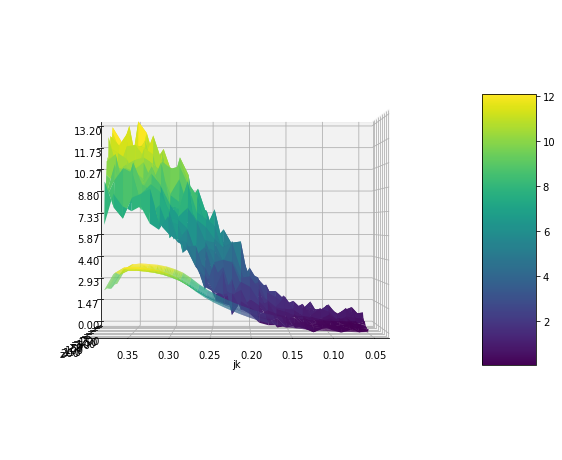

In [15]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
Z_data, JK_data = np.meshgrid(z_data, jk_data)
surf = ax.plot_surface(JK_data, Z_data, H, cmap='viridis', rstride=1, cstride=1,
                    edgecolor='none')
surf2 = ax.plot_surface(JK_data, Z_data, comp_10, cmap='viridis', rstride=1, cstride=1,
                    edgecolor='none')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(elev=0., azim=90)
ax.set_xlabel("jk")
ax.set_ylabel("z")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

<ipython-input-16-f6991cbb2d98>:3: RuntimeWarning: divide by zero encountered in log
  ax.plot_surface(JK_data, Z_data, np.log(H/comp_10), cmap='viridis', rstride=1, cstride=1,
<ipython-input-16-f6991cbb2d98>:10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)
/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:113: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


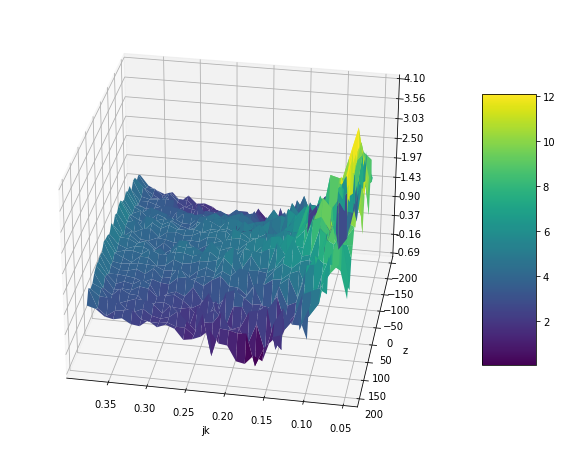

In [16]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
Z_data, JK_data = np.meshgrid(z_data, jk_data)
ax.plot_surface(JK_data, Z_data, np.log(H/comp_10), cmap='viridis', rstride=1, cstride=1,
                    edgecolor='none')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(elev=30., azim=100)
ax.set_xlabel("jk")
ax.set_ylabel("z")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Text(0, 0.5, 'nu')

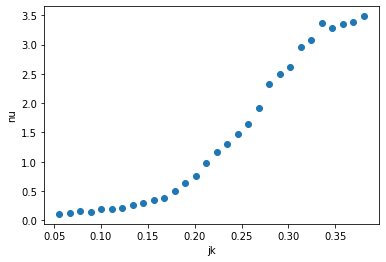

In [17]:
plt.scatter(jk_data, np.sum(H, axis=1)*dJK)
plt.xlabel("jk")
plt.ylabel("nu")

Text(0, 0.5, 'nu')

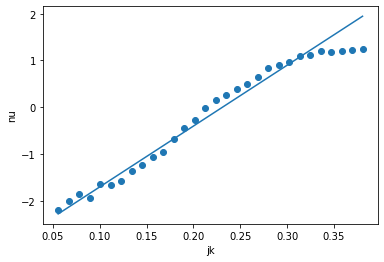

In [25]:
grad = 13
intercept = -3


plt.scatter(jk_data, np.log(np.sum(H, axis=1)*dJK))
plt.plot(jk_data, grad*jk_data+intercept)
plt.xlabel("jk")
plt.ylabel("nu")

Text(0, 0.5, 'compz')

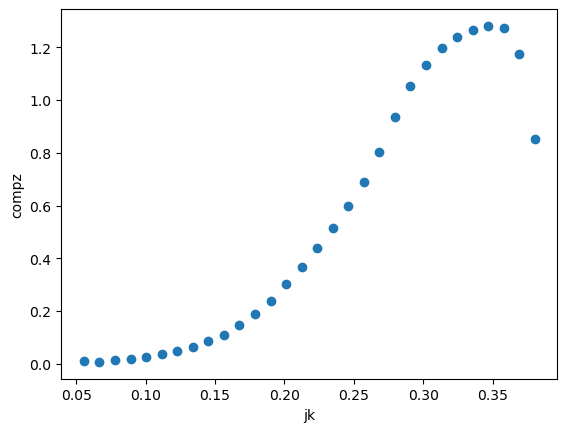

In [176]:
# plt.yscale("log")
plt.scatter(jk_data, np.sum(comp_10, axis=1)*dJK)
plt.xlabel("jk")
plt.ylabel("compz")

In [190]:
y[1:28].shape

(27,)

Text(0, 0.5, 'nu/compz')

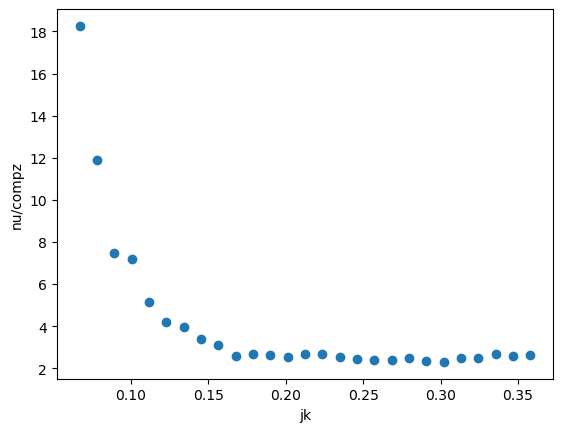

In [188]:
# plt.yscale("log")
y = np.sum(H, axis=1)/np.sum(comp_10, axis=1)
plt.scatter(jk_data[1:28], y[1:28])
plt.xlabel("jk")
plt.ylabel("nu/compz")
# plt.xlim(0.19, 0.3)

In [208]:
from scipy.optimize import curve_fit

def logistic(x, a, b, c, d):
    return a/(1+np.exp(-b*(x-c))) + d

xs, ys = jk_data[1:28], y[1:28]

popt, pcov = curve_fit(logistic, xs, ys, p0=( -50, 35,  0.04,  52))
popt

array([-4.37866094e+04,  4.15074925e+01, -1.24833960e-01,  4.37891620e+04])

Text(0, 0.5, 'nu/compz')

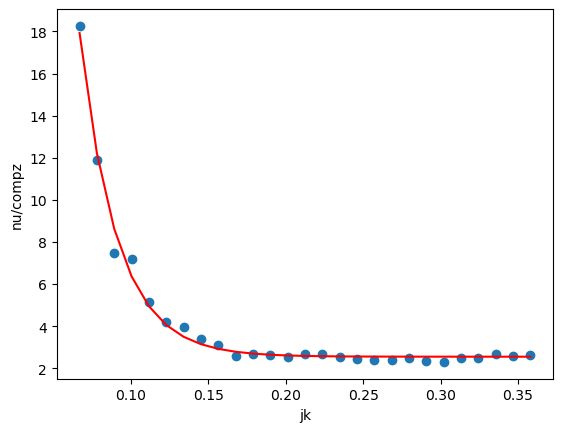

In [209]:
# popt = np.array([ -50, 35,  0.04,  52])
plt.scatter(xs, ys)
plt.plot(xs, logistic(xs, *popt), c="r")
plt.xlabel("jk")
plt.ylabel("nu/compz")
